In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
import seaborn as sns
from statsmodels.graphics.factorplots import interaction_plot

import warnings
warnings.filterwarnings('ignore')

plt.rc('xtick', labelsize = 12)
plt.rc('ytick', labelsize = 12)
plt.rc('axes', labelsize = 16, labelpad = 20)

df = pd.read_csv(
    'cleaned_data.csv'
)
for col in ['region', 'sex', 'children', 'smoker']:
    df[col] = df[col].astype('category')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_transformed,charges_transformed
0,19,female,27.900,0,yes,southwest,16884.92400,4.632782,12.128980
1,18,male,33.770,1,no,southeast,1725.55230,5.058687,8.808596
2,28,male,33.000,3,no,southeast,4449.46200,5.005229,10.147521
3,33,male,22.705,0,no,northwest,21984.47061,4.213339,12.534950
4,32,male,28.880,0,no,northwest,3866.85520,4.707037,9.945637


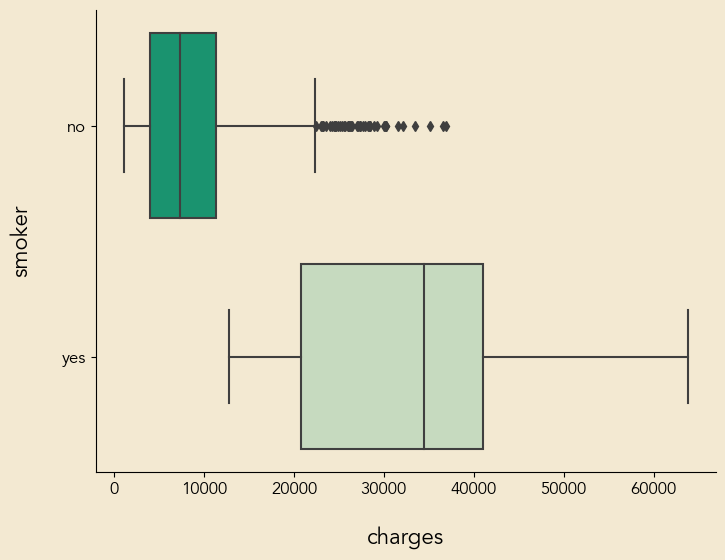

In [31]:
fig = plt.figure(figsize = (8,6), facecolor = '#f3e9d2')

my_palette = {
    'darkblue' : '#114b5f',
    'darkgreen' : '#1a936f',
    'mediumgreen' : '#88d498',
    'lightgreen' : '#c6dabf',
    'tan' : '#f3e9d2'
}

ax = sns.boxplot(
    data = df,
    y = 'smoker',
    x = 'charges',
    palette='tab20'
)

for dir in ['top','right']:
    ax.spines[dir].set_visible(False)


ax.set_facecolor('#f3e9d2')
ax.patches[0].set_facecolor(my_palette['darkgreen'])
ax.patches[1].set_facecolor(my_palette['lightgreen'])

font = {
    'family' : 'Avenir',
    'weight' : 'bold',
    'size' : 22
} 

plt.rc('font', **font)

In [21]:
ax.patches

<Axes.ArtistList of 2 patches>